In [7]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt

In [8]:
df=pd.read_csv("A:\Data_Uhasselt\Projects\BTC_P\BTCUSDT_H1.csv", delimiter=';') 
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\siava\AppData\Local\Temp\ipykernel_15988\2263018935.py:1: SyntaxWarning: invalid escape sequence '\D'
  df=pd.read_csv("A:\Data_Uhasselt\Projects\BTC_P\BTCUSDT_H1.csv", delimiter=';')


,time,hour,open,high,low,close,volume
0,23/12/2023,17:00:00,43819.82,43819.82,43734.45,43751.89,58
1,23/12/2023,18:00:00,43751.88,43850.00,43701.39,43797.10,54
2,23/12/2023,19:00:00,43821.78,43821.78,43700.00,43700.06,56
3,23/12/2023,20:00:00,43729.93,43749.82,43648.00,43689.59,59
4,23/12/2023,21:00:00,43689.59,43784.60,43664.00,43761.54,56


In [9]:
df.isnull().sum()

time      0
hour      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    10000 non-null  object 
 1   hour    10000 non-null  object 
 2   open    10000 non-null  float64
 3   high    10000 non-null  float64
 4   low     10000 non-null  float64
 5   close   10000 non-null  float64
 6   volume  10000 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 547.0+ KB


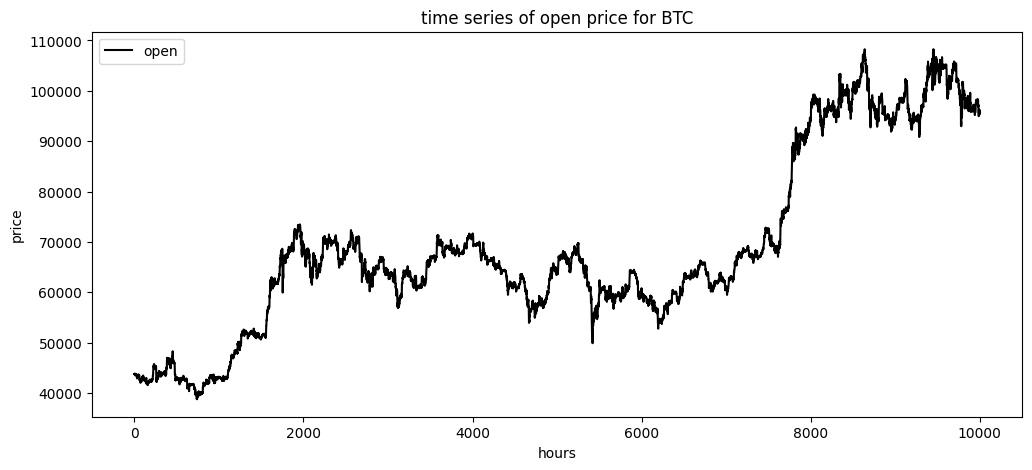

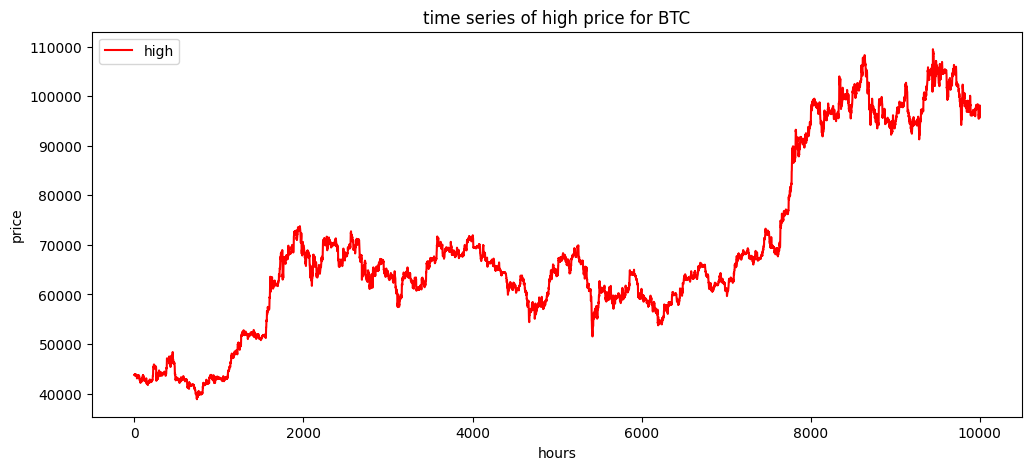

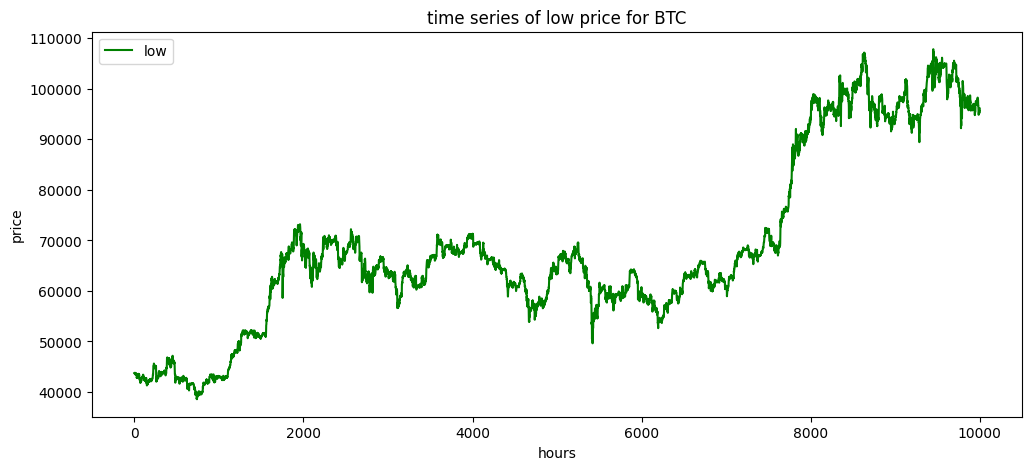

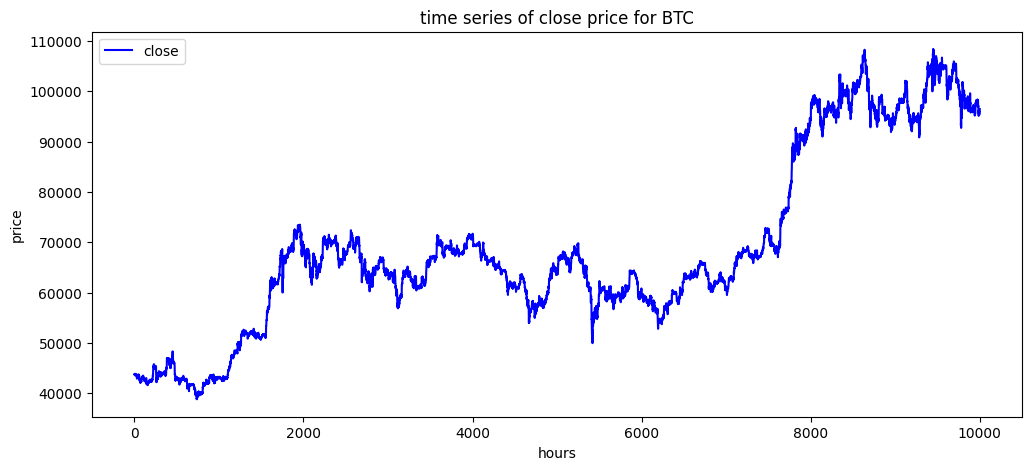

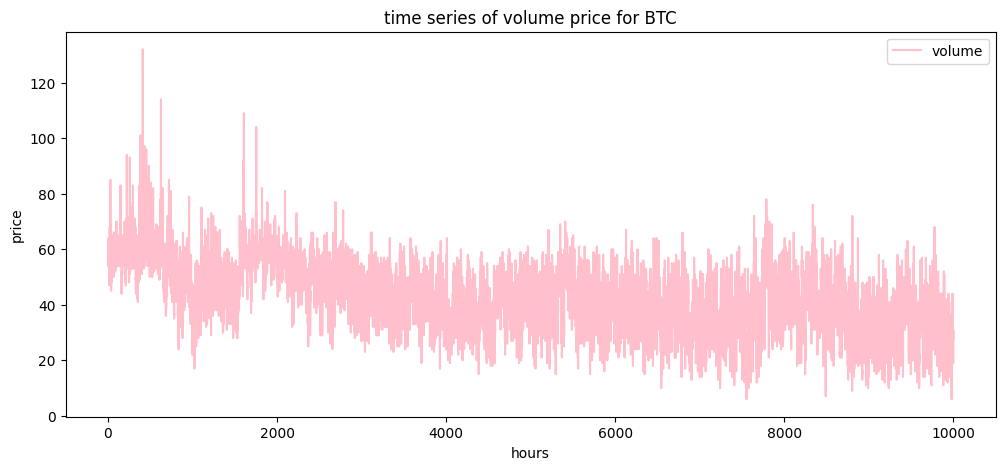

In [11]:
color_price = ['black','red','green','blue','pink']

for i in range(5):
    plt.figure(figsize=(12,5))
    plt.plot(range(len(df)) , df[df.columns[i+2]] , color = color_price[i] , label = df.columns[i+2])
    plt.legend()
    plt.title('time series of '+df.columns[i+2]+' price for BTC')
    plt.xlabel('hours')
    plt.ylabel('price')
    plt.show()

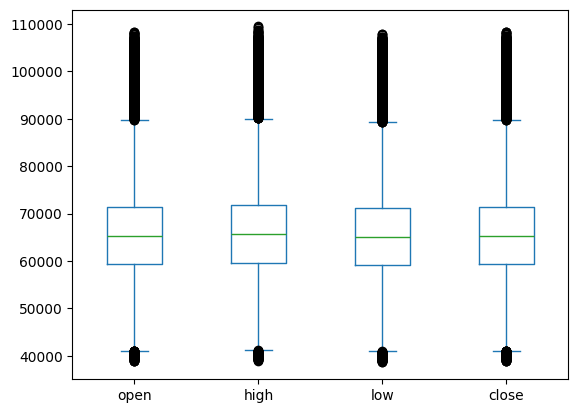

In [12]:
df.iloc[:,2:6].plot(kind = 'box')
plt.show()

In [13]:
q1 , q2 , q3 = df['open'].quantile([0.25,0.5,0.75])

In [14]:
d = q3 - q1
d

12180.410000000003

In [15]:
upper_bound = q3 + 1.5*d
lower_bound = q1 - 1.5*d
print(upper_bound)
print(lower_bound)

89734.68000000001
41013.03999999999


In [16]:
df[df['open']>upper_bound]

,time,hour,open,high,low,close,volume
7822,13/11/2024,15:00:00,91429.63,92658.11,90504.72,92550.00,70
7823,13/11/2024,16:00:00,92550.00,93225.58,91506.02,92192.05,63
7824,13/11/2024,17:00:00,92192.06,92788.91,91798.27,92157.99,54
7825,13/11/2024,18:00:00,92158.00,93047.91,92056.61,92722.06,57
7826,13/11/2024,19:00:00,92722.67,92848.30,90025.72,90500.68,60
...,...,...,...,...,...,...,...
9995,12/02/2025,04:00:00,95257.18,95571.64,95246.52,95571.64,29
9996,12/02/2025,05:00:00,95405.37,95902.72,95405.37,95812.37,29
9997,12/02/2025,06:00:00,95898.68,95903.18,95652.18,95798.43,27
9998,12/02/2025,07:00:00,95751.39,98141.45,95751.38,96142.96,31


In [17]:
df_new = df['open']
df_new

0       43819.82
1       43751.88
2       43821.78
3       43729.93
4       43689.59
          ...   
9995    95257.18
9996    95405.37
9997    95898.68
9998    95751.39
9999    96093.24
Name: open, Length: 10000, dtype: float64

In [18]:
d=q3-q1
d

12180.410000000003

In [19]:
train = df_new[:int(len(df)*0.7)]
test = df_new[int(len(df)*0.7):]

In [20]:
n_past = 45
n_future = 1

In [21]:
# split x_train and y_train using train data

timesample = len(train)-(n_past+n_future)-1
x_train = []
y_train = []


for i in range(timesample):
    x_train.append(train[i:i+n_past])
    y_train.append(train[i+n_past:i+n_past+n_future])
    
x_train , y_train = np.array(x_train) , np.array(y_train)

## Split train and test data

In [22]:
print('number of x_train: {} and shape of x_train: {}'.format(len(x_train),x_train.shape))
print('number of y_train: {} and shape of y_train: {}'.format(len(y_train),y_train.shape))

number of x_train: 6953 and shape of x_train: (6953, 45)
number of y_train: 6953 and shape of y_train: (6953, 1)


In [23]:
print(timesample)

6953


In [24]:
# split x_test and y_test using test data

timesample_test = len(test)-(n_past+n_future)-1
x_test = []
y_test = []


for i in range(timesample_test):
    x_test.append(test[i:i+n_past])
    y_test.append(test[i+n_past:i+n_past+n_future])
    
x_test , y_test = np.array(x_test) , np.array(y_test)

In [25]:
print('number of x_test: {} and shape of x_test: {}'.format(len(x_test),x_test.shape))
print('number of y_test: {} and shape of y_test: {}'.format(len(y_test),y_test.shape))

number of x_test: 2953 and shape of x_test: (2953, 45)
number of y_test: 2953 and shape of y_test: (2953, 1)


In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
reg = LinearRegression()

In [28]:
reg.fit(x_train , y_train)

LinearRegression()

In [29]:
y_pred = reg.predict(x_test)
y_pred

array([[62543.55406803],
       [62688.78273049],
       [62541.02469554],
       ...,
       [95533.19940712],
       [95200.04507311],
       [95394.45223656]], shape=(2953, 1))

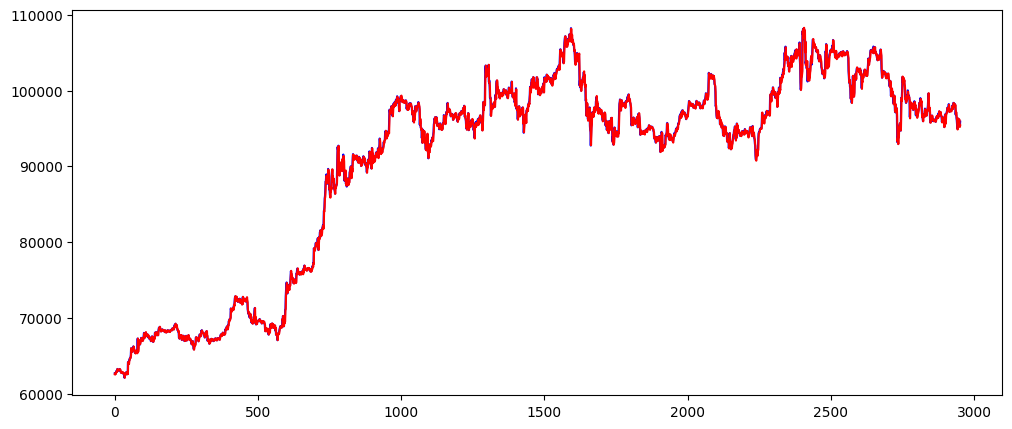

In [30]:
plt.figure(figsize=(12,5))
plt.plot(range(len(y_test)) , y_test , color = 'b')
plt.plot(range(len(y_pred)) , y_pred , color = 'r')
plt.show()

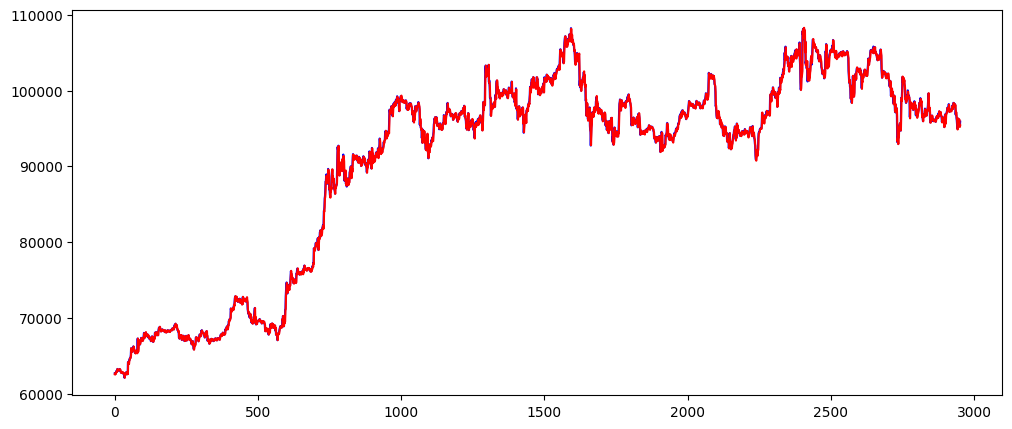

In [31]:
plt.figure(figsize=(12,5))
plt.plot(range(len(y_test)) , y_test[:10000] , color = 'b')
plt.plot(range(len(y_pred)), y_pred[:10000] , color = 'r')
plt.show()

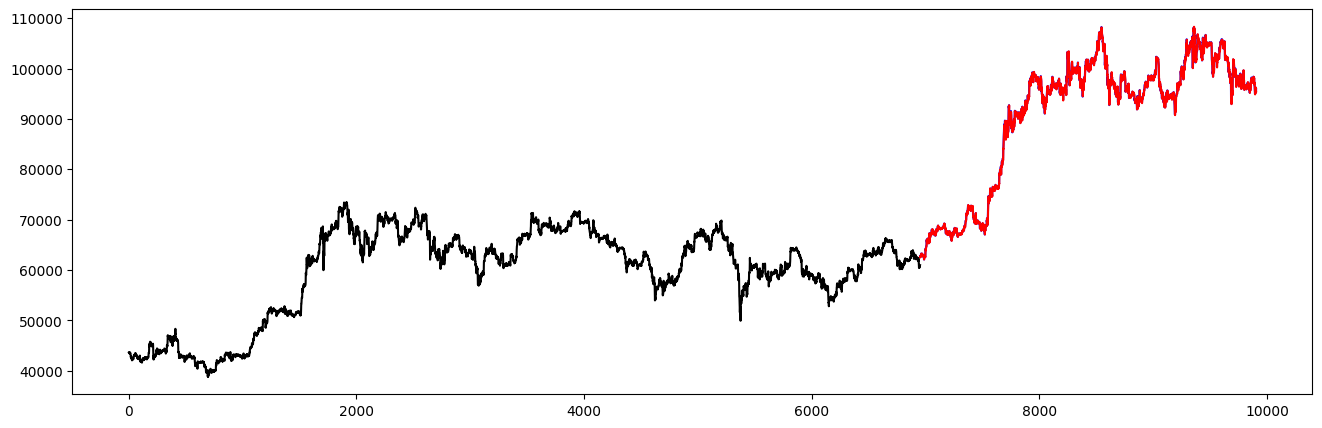

In [32]:
plt.figure(figsize=(16,5))
plt.plot(range(len(y_train)), y_train, color='black')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, color='b')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_pred, color='r')
plt.show()

In [35]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

R-squared: 0.9984078167245289
